In [1]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

In [2]:
data = []
label = []

SIZE = 128

dataset_dir = './flowers/'
for dir in os.listdir(dataset_dir):
    for file in os.listdir(os.path.join(dataset_dir, dir)):
        if file.endswith("jpg"):
            label.append(dir)
            # Read the image
            img = cv2.imread(os.path.join(dataset_dir, dir, file))
            # Convert it to RGB format
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # Resize all the images to same size
            im = cv2.resize(img_rgb, (SIZE, SIZE))
            data.append(im)

In [3]:
# convert the data into numerical values
data_arr = np.array(data)
label_arr = np.array(label)

In [4]:
# use label encoder to normalize the data
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y, 5)
X = data_arr/255

In [5]:
# split dataset into 80% training data and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [6]:
# A neural network model for task of Flower Recognition
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

In [7]:
# create more training images to prevent overfitting
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

In [8]:
# Compile the neural network model
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=64
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_test,y_test),
                              verbose = 1)

C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/64
108/108 [==============================] - 74s 443ms/step - loss: 1.5414 - accuracy: 0.2911 - val_loss: 1.3731 - val_accuracy: 0.4074
Epoch 2/64
108/108 [==============================] - 39s 361ms/step - loss: 1.3899 - accuracy: 0.4095 - val_loss: 1.2646 - val_accuracy: 0.4919
Epoch 3/64
108/108 [==============================] - 38s 347ms/step - loss: 1.3099 - accuracy: 0.4555 - val_loss: 1.1609 - val_accuracy: 0.5752
Epoch 4/64
108/108 [==============================] - 38s 349ms/step - loss: 1.2410 - accuracy: 0.4975 - val_loss: 1.1525 - val_accuracy: 0.5382
Epoch 5/64
108/108 [==============================] - 37s 343ms/step - loss: 1.1703 - accuracy: 0.5265 - val_loss: 1.1483 - val_accuracy: 0.5486
Epoch 6/64
108/108 [==============================] - 37s 342ms/step - loss: 1.1312 - accuracy: 0.5569 - val_loss: 1.0570 - val_accuracy: 0.5926
Epoch 7/64
108/108 [==============================] - 37s 342ms/step - loss: 1.1134 - accuracy: 0.5662 - val_loss: 1.0305 - val_ac

108/108 [==============================] - 11s 105ms/step - loss: 0.6559 - accuracy: 0.7564 - val_loss: 0.6598 - val_accuracy: 0.7639
Epoch 58/64
108/108 [==============================] - 11s 103ms/step - loss: 0.6283 - accuracy: 0.7666 - val_loss: 0.6814 - val_accuracy: 0.7604
Epoch 59/64
108/108 [==============================] - 11s 105ms/step - loss: 0.6460 - accuracy: 0.7614 - val_loss: 0.6513 - val_accuracy: 0.7616
Epoch 60/64
108/108 [==============================] - 11s 102ms/step - loss: 0.6514 - accuracy: 0.7666 - val_loss: 0.7390 - val_accuracy: 0.7280
Epoch 61/64
108/108 [==============================] - 11s 101ms/step - loss: 0.6479 - accuracy: 0.7648 - val_loss: 0.6280 - val_accuracy: 0.7708
Epoch 62/64
108/108 [==============================] - 11s 102ms/step - loss: 0.6317 - accuracy: 0.7686 - val_loss: 0.7000 - val_accuracy: 0.7616
Epoch 63/64
108/108 [==============================] - 11s 101ms/step - loss: 0.6190 - accuracy: 0.7732 - val_loss: 0.6279 - val_accurac

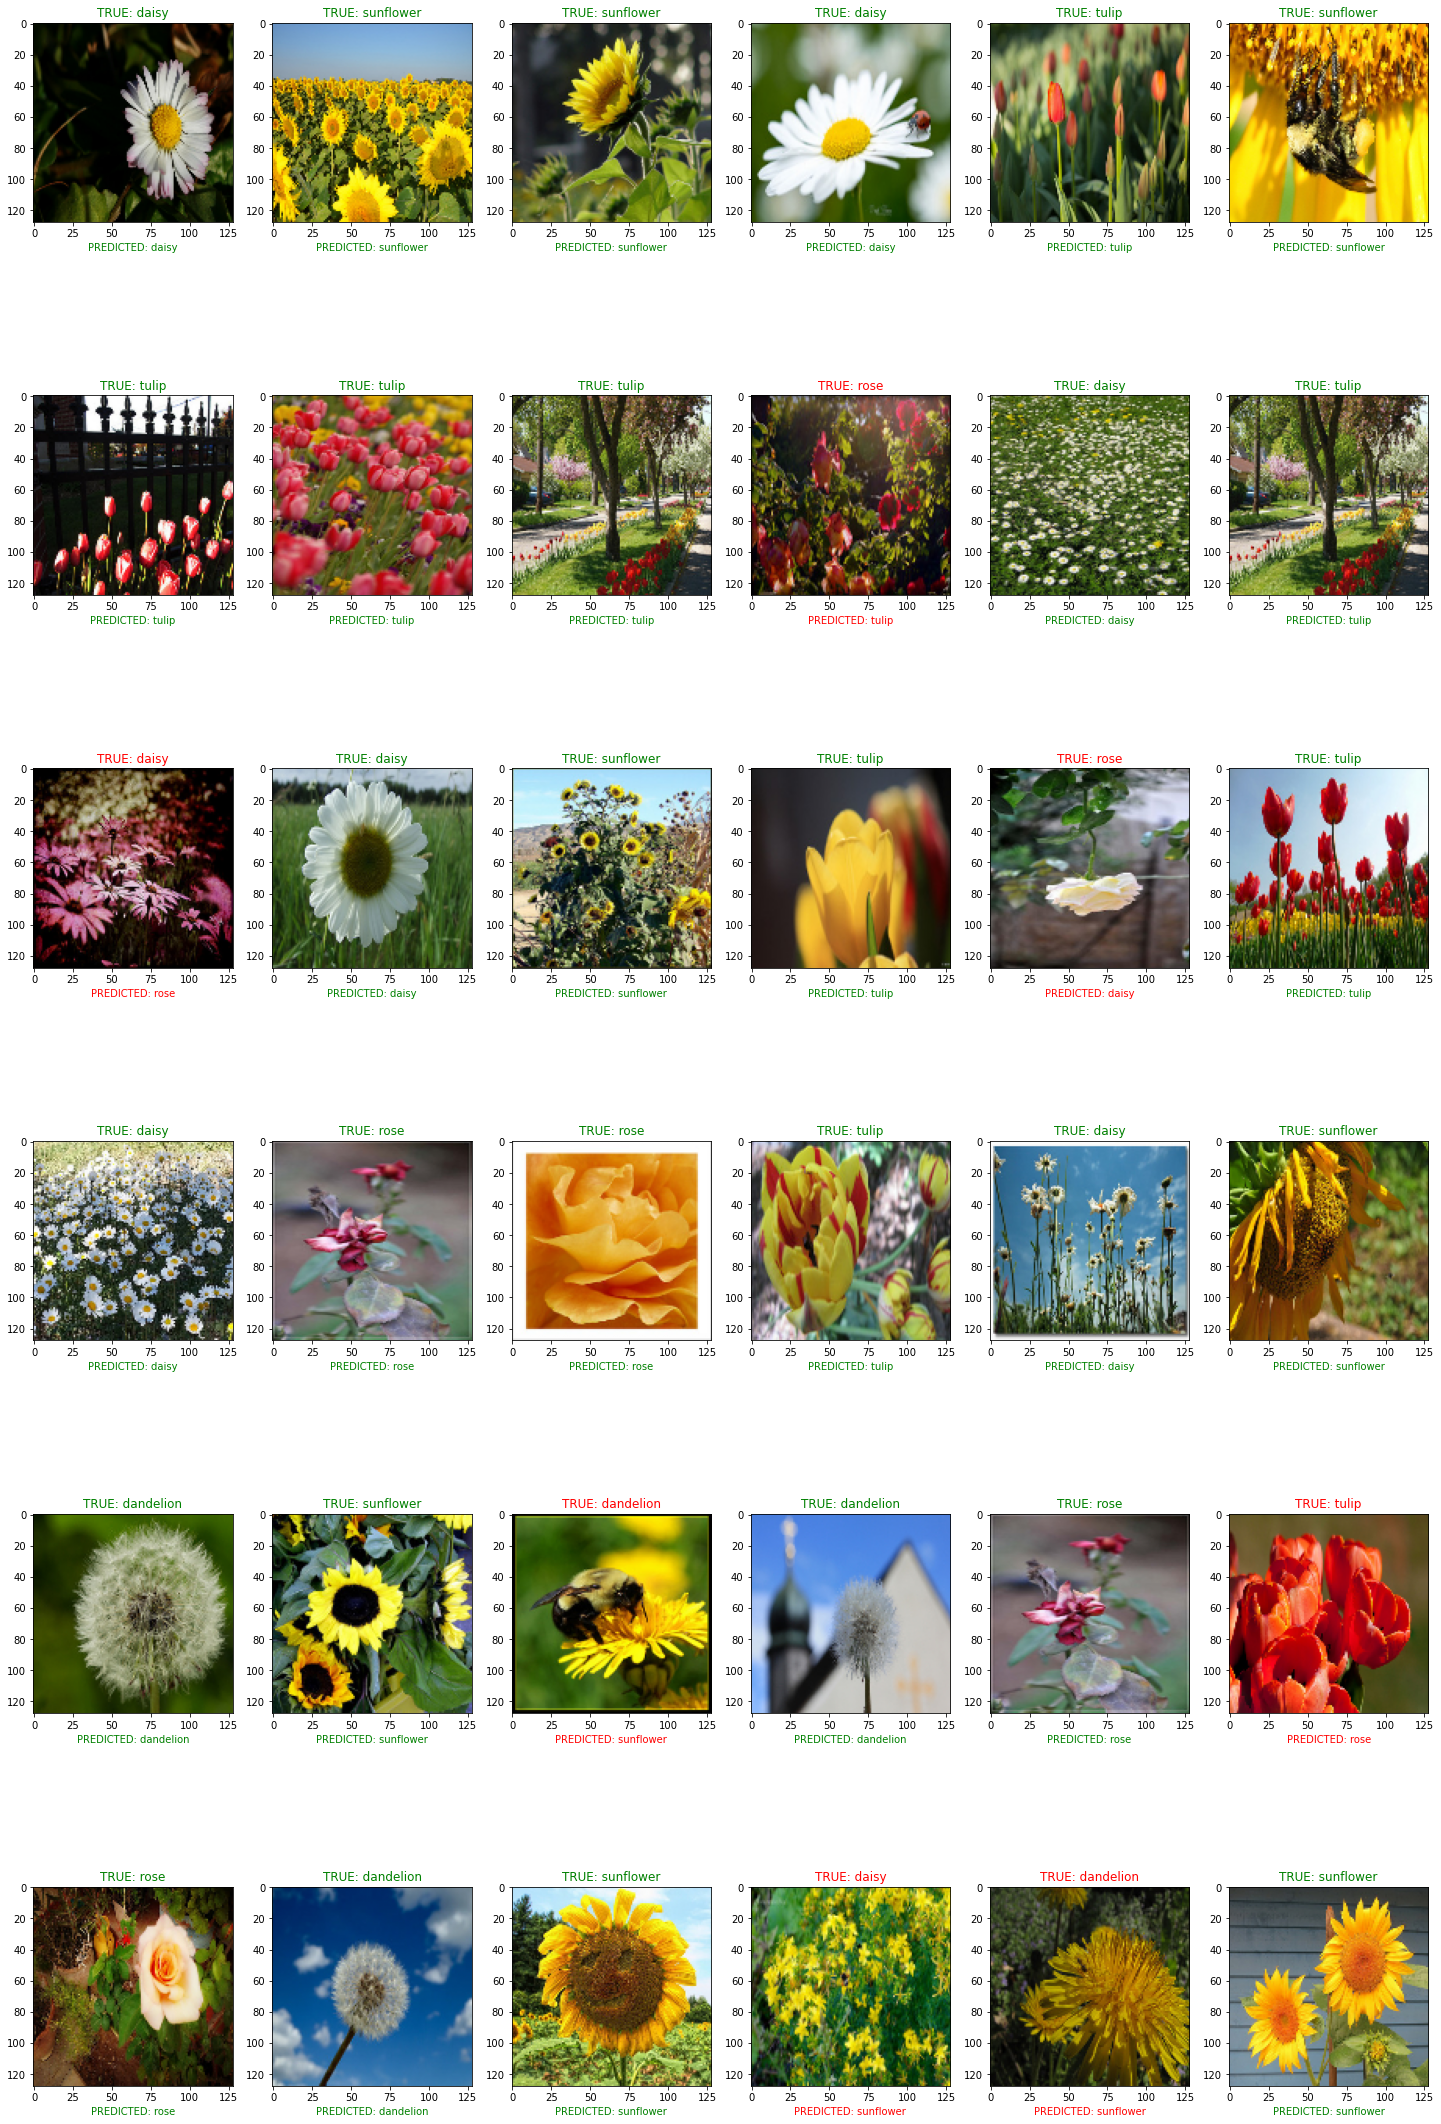

In [13]:
import matplotlib.pyplot as plt
categories = np.sort(os.listdir(dataset_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))
for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')